In [0]:
pip install -q tensorflow

In [0]:
#import tensorflow as tf1
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

In [0]:
pip install -q keras

In [109]:
pip install matplotlib

In [0]:
from keras.datasets import fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

Text(0.5, 1.0, '3')

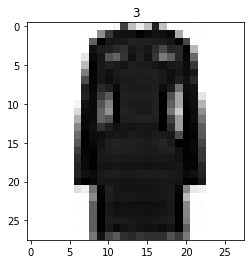

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
idx = 500
plt.imshow(x_train[idx],cmap="Greys")
plt.title(y_train[idx])

In [174]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
x_train = x_train.reshape((x_train.shape[0],-1))
x_test = x_test.reshape((x_test.shape[0],-1))

In [176]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [0]:
x_train = x_train.astype("float32")
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [179]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
learning_rate = 0.001
training_epochs = 2000
cost_history = np.empty(shape = [1],dtype = 'float32')
n_dim = x_train.shape[1]
n_class = 10

In [0]:
x = tf.placeholder(tf.float32,[None,n_dim])
w = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_ = tf.placeholder(tf.float32,[None,n_class])

In [0]:
n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256

In [0]:
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_4, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.truncated_normal([n_dim, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_4, n_class]))
}
biases = {
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class]))
}

In [0]:
y = multilayer_perceptron(x, weights, biases)
accuracy_history = []
batch_size = 100

In [0]:
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost_function)
training_step = 1

In [187]:
with tf.Session() as sess:
  #init = tf.global_variables_initializer()
  for epoch in range(training_epochs):
    #sess.run(init)
    sess.run(training_step,feed_dict = {x: x_train, y_:y_train})
    cost = sess.run([optimizer,cost_function],feed_dict = {x: x_train, y_:y_train})
    cost_history = np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    acu_temp = accuracy.eval({x: x_test, y: y_test})
    accuracy_history.append(acu_temp)
    if epoch % 200 ==0:
      print('epoch: ', epoch,' - ','cost: ', cost_fn, "-accuracy :",accuracy)

TypeError: ignored

In [0]:
# cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_))
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

# # Initializing the variables
# init = tf.global_variables_initializer()
# #create an empty list to store the cost history and accuracy history
# cost_history = []
# accuracy_history = []
# # Launch the graph
# with tf.Session() as sess:
#     sess.run(init)

#     # Training cycle
#     for epoch in range(training_epochs):
#          # Run optimization op (backprop) and cost op (to get loss value)
#             _, c = sess.run([optimizer, cost], feed_dict={x: x_train,y: y_train})
#             correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
#             accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
#             acu_temp = accuracy.eval({x: x_test, y: y_test})
#             #append the accuracy to the list
#             accuracy_history.append(acu_temp)
#             #append the cost history
#             cost_history.append(c)
#             if epoch % 200 == 0:
#               print("Epoch:", '%04d' % (epoch + 1), "- cost=", c , "- Accuracy=",acu_temp)